In [3]:
#Importing all the packages that we will use and setting them with short, easy names
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

#These packages were not introduced in class, however I will be using them to refine my plots
#These two pakages will be used to create a short animation
# from matplotlib.animation import FuncAnimation as fani
# from IPython import display

#This package contains color maps that I prefer
import cmocean.cm as cmo

## <b>ECMWF ERA5 Monthly Averaged Single Levels: Total Precipitation </b>
---
### <b>Documentation: </b>
##### Dataset Overview: 
https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=overview
##### Dataset Documentation: 
https://confluence.ecmwf.int/pages/viewpage.action?pageId=505390919

---

I will be using the data from the ERA5 Reanalysis. More specifically, I plan to use the total precipitation data. Please see the data below.


In [4]:
# File path for the dataset.
# NOTE: this file path is for my local machine and not the Hopper Directory.
file_path = 'W:\CLIM 680\ECMWF ERA5 Monthly Averaged Single Levels\ERA5 Monthly Averaged on Single Levels [Total Precipitation].nc'

# Open the ERA5 dataset: 
ERA5 = xr.open_dataset(file_path)
ERA5

<xarray.Dataset> Size: 4GB
Dimensions:     (valid_time: 1028, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver      (valid_time) <U4 16kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 4GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-15T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
# Extract the total precipitation data from the ERA5 dataset
tp = ERA5['tp']
tp

<xarray.DataArray 'tp' (valid_time: 1028, latitude: 721, longitude: 1440)> Size: 4GB
array([[[4.425049e-04, 4.425049e-04, ..., 4.425049e-04, 4.425049e-04],
        [4.348755e-04, 4.348755e-04, ..., 4.348755e-04, 4.348755e-04],
        ...,
        [1.678467e-04, 1.678467e-04, ..., 1.678467e-04, 1.678467e-04],
        [1.525879e-04, 1.525879e-04, ..., 1.525879e-04, 1.525879e-04]],

       [[3.604889e-04, 3.604889e-04, ..., 3.604889e-04, 3.604889e-04],
        [3.614426e-04, 3.614426e-04, ..., 3.614426e-04, 3.614426e-04],
        ...,
        [1.115799e-04, 1.115799e-04, ..., 1.106262e-04, 1.106262e-04],
        [9.536743e-05, 9.536743e-05, ..., 9.536743e-05, 9.536743e-05]],

       ...,

       [[1.296997e-03, 1.296997e-03, ..., 1.296997e-03, 1.296997e-03],
        [1.350403e-03, 1.352310e-03, ..., 1.350403e-03, 1.350403e-03],
        ...,
        [2.708435e-04, 2.708435e-04, ..., 2.708435e-04, 2.708435e-04],
        [2.479553e-04, 2.479553e-04, ..., 2.479553e-04, 2.479553e-04]],

       [[6.237030e-04, 6.237030e-04, ..., 6.237030e-04, 6.237030e-04],
        [6.313324e-04, 6.313324e-04, ..., 6.313324e-04, 6.313324e-04],
        ...,
        [4.138947e-04, 4.138947e-04, ..., 4.138947e-04, 4.138947e-04],
        [3.967285e-04, 3.967285e-04, ..., 3.967285e-04, 3.967285e-04]]],
      dtype=float32)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver      (valid_time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgad
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [26]:
# Converting total precip from meters to mm:
tp = ERA5['tp']*1000  

# Assign all the attributes of the dataset
# (For some reason they are lost when doing the above calculation)
# Change the attributes to correctly show new units:
tp.attrs = ERA5['tp'].attrs
tp.attrs['units'] = 'mm'

tp

<xarray.DataArray 'tp' (valid_time: 1028, latitude: 721, longitude: 1440)> Size: 4GB
array([[[0.44250488, 0.44250488, 0.44250488, ..., 0.44250488,
         0.44250488, 0.44250488],
        [0.4348755 , 0.4348755 , 0.4348755 , ..., 0.4348755 ,
         0.4348755 , 0.4348755 ],
        [0.4043579 , 0.4043579 , 0.4043579 , ..., 0.4043579 ,
         0.4043579 , 0.4043579 ],
        ...,
        [0.16593933, 0.16593933, 0.16593933, ..., 0.16593933,
         0.16593933, 0.16593933],
        [0.16784668, 0.16784668, 0.16784668, ..., 0.16784668,
         0.16784668, 0.16784668],
        [0.15258789, 0.15258789, 0.15258789, ..., 0.15258789,
         0.15258789, 0.15258789]],

       [[0.3604889 , 0.3604889 , 0.3604889 , ..., 0.3604889 ,
         0.3604889 , 0.3604889 ],
        [0.36144257, 0.36144257, 0.36144257, ..., 0.36144257,
         0.36144257, 0.36144257],
        [0.3671646 , 0.3671646 , 0.3671646 , ..., 0.3671646 ,
         0.3671646 , 0.3671646 ],
...
        [0.2937317 , 0.2937317 , 0.2937317 , ..., 0.2937317 ,
         0.2937317 , 0.2937317 ],
        [0.2708435 , 0.2708435 , 0.2708435 , ..., 0.2708435 ,
         0.2708435 , 0.2708435 ],
        [0.24795532, 0.24795532, 0.24795532, ..., 0.24795532,
         0.24795532, 0.24795532]],

       [[0.623703  , 0.623703  , 0.623703  , ..., 0.623703  ,
         0.623703  , 0.623703  ],
        [0.6313324 , 0.6313324 , 0.6313324 , ..., 0.6313324 ,
         0.6313324 , 0.6313324 ],
        [0.623703  , 0.623703  , 0.623703  , ..., 0.62179565,
         0.62179565, 0.62179565],
        ...,
        [0.4043579 , 0.4043579 , 0.4043579 , ..., 0.40245056,
         0.40245056, 0.4043579 ],
        [0.41389465, 0.41389465, 0.41389465, ..., 0.41389465,
         0.41389465, 0.41389465],
        [0.39672852, 0.39672852, 0.39672852, ..., 0.39672852,
         0.39672852, 0.39672852]]], dtype=float32)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8kB 1940-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    expver      (valid_time) <U4 16kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgad
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    mm
    standard_name:                            unknown
    GRIB_surface:                             0.0

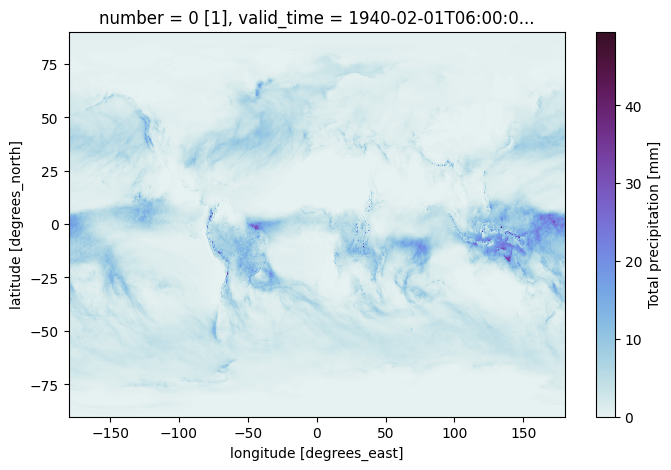

In [27]:
# This is a test plot to make sure the data is loaded correctly. 
# NOTE: I used a colormap from cmocean. 
tp[1,:,:].plot(figsize=(8,5),cmap=cmo.dense)

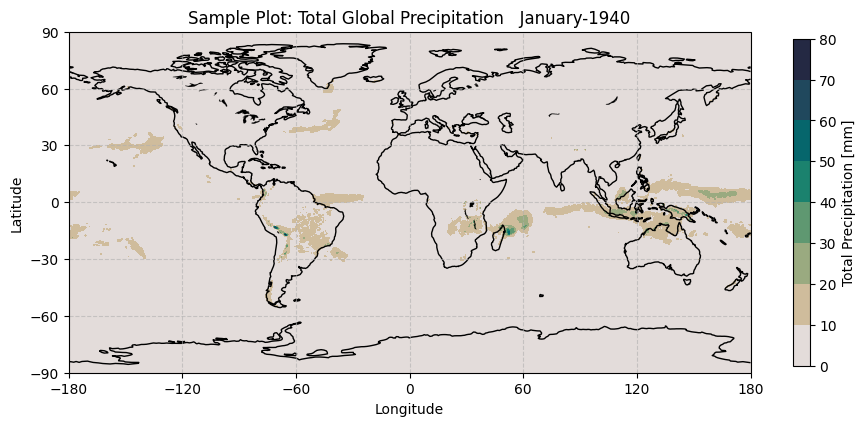

In [29]:
# Create a sample plot to get the foramtting of the subsequent plots correct. 

# Create the figure and set the size.
fig = plt.figure(figsize=(11,8.5))

# Create the axes and set the projection that will be used for my plots.
ax = plt.axes(projection=ccrs.PlateCarree())

# This line plots the data from the first entry in my dataset.
# NOTE: I am using a color map from the cmocean package.
im = ax.contourf(tp['longitude'],tp['latitude'],tp[0,:,:],cmap=cmo.rain)

# Create and format the color bar and add a title.
plt.colorbar(im,shrink=.5,label='Total Precipitation [mm]')

# Set the labels for the lat and lon along with labels
# Create dashed gridlines that with 60% transparency
ax.set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.gridlines(linestyle='--',alpha=.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create a title for the plot
# The date for the first entry is extracted from the tp dataset using dt.strftime()
plt.title('Sample Plot:' + ' Total Global Precipitation   ' + tp['valid_time'][0].dt.strftime("%B-%Y").item())

# Add the coastlines
# Add lakes and format it black
ax.add_feature(cfeature.LAKES, linewidth=.1,color='k')
ax.coastlines()

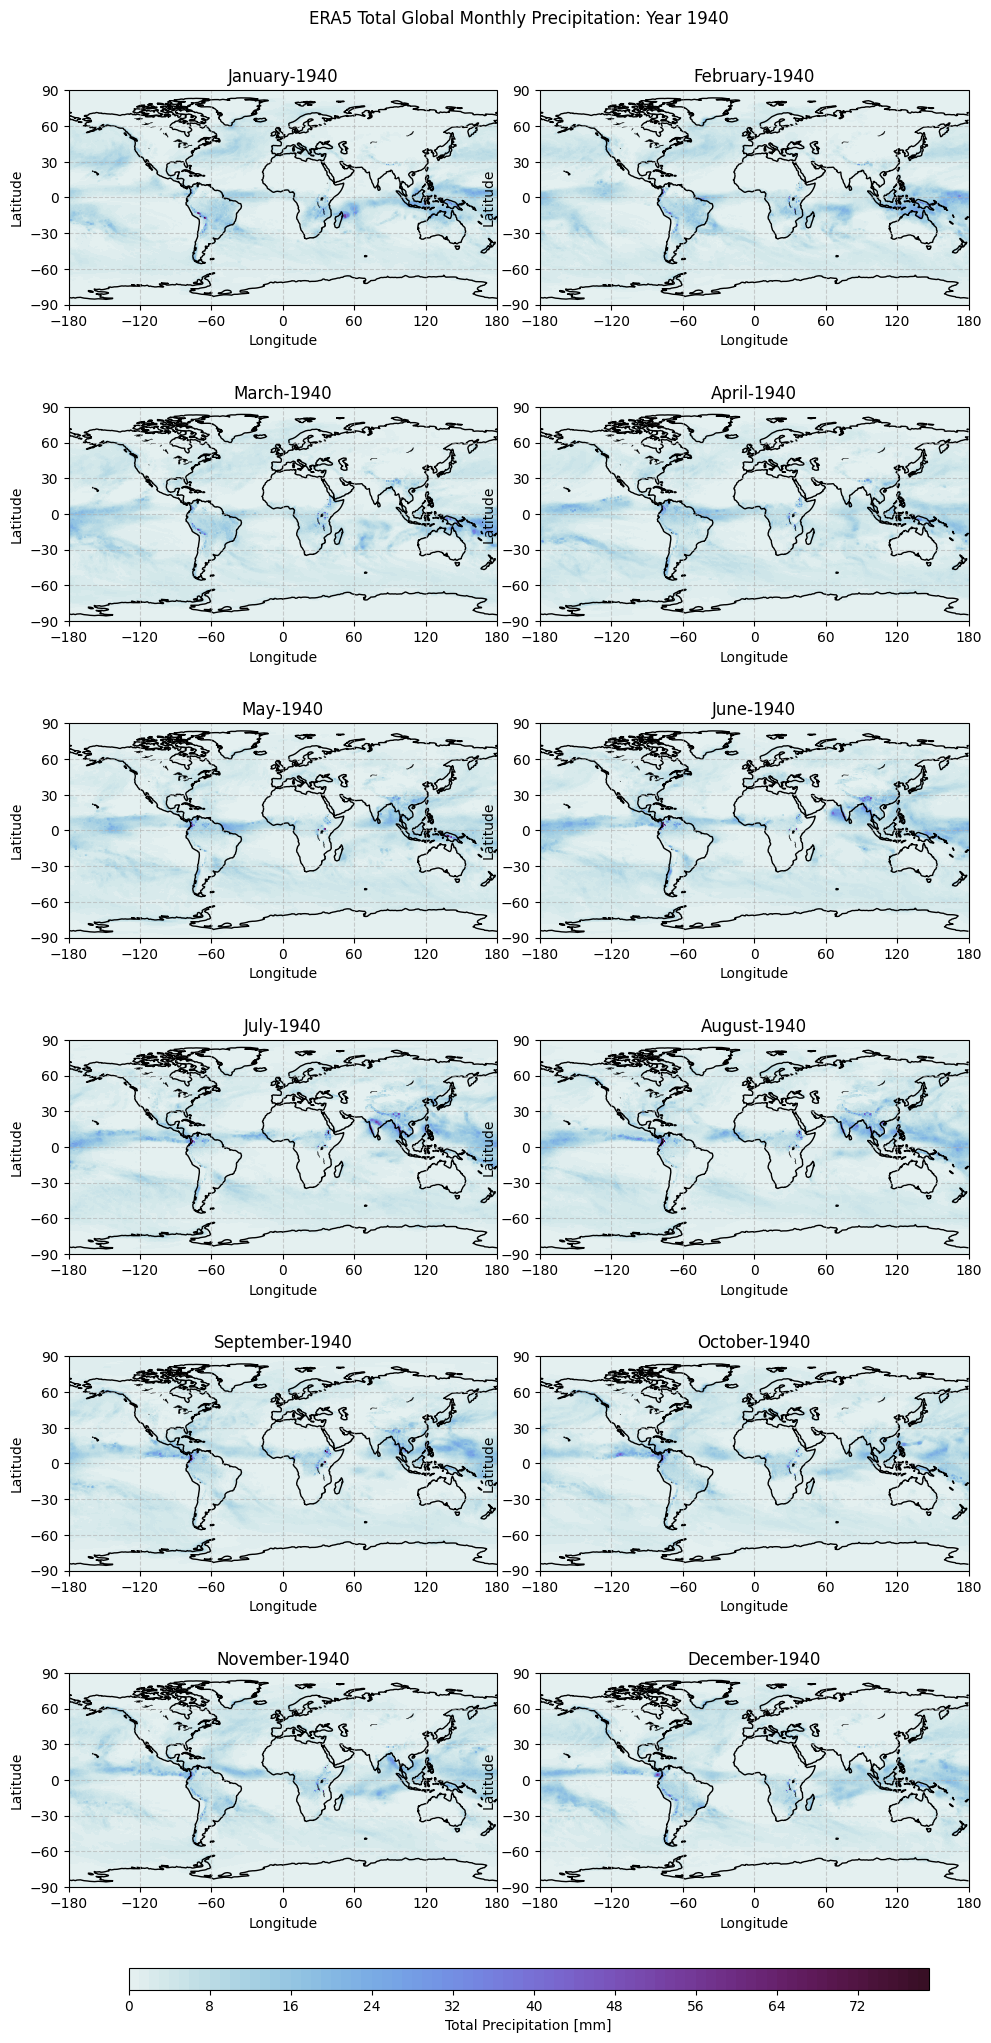

In [107]:
# Create fig and 12 axes objects for our plots
fig, ax = plt.subplots(nrows=6, 
                         ncols=2,
                         figsize=(10,22),
                         subplot_kw={'projection': ccrs.PlateCarree()})

ax = ax.flatten()

clevs = np.arange(0,80,1)

# Loops through all the axes and plots the data
for i in np.arange(0,12):

    # Plot the data for each corresponding axis according the incrimenting number k.
    im = ax[i].contourf(tp['longitude'],tp['latitude'],tp[i,:,:], 
                        clevs,
                        cmap=cmo.dense)

    # Create ticks and labels for the x and y axis.
    # Create gridlines with 60% transparency.
    ax[i].set_xticks(range(-180, 181, 60), crs=ccrs.PlateCarree())
    ax[i].set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
    ax[i].set_xlabel('Longitude')
    ax[i].set_ylabel('Latitude')
    ax[i].gridlines(linestyle='--',
                    alpha=.6)

    # # Add a title with the date from each entry that is being plotted using dt.srtftime().
    ax[i].set_title(tp['valid_time'][i].dt.strftime("%B-%Y").item())
    
    # # Add the coastlines and the great lakes to the plot.
    ax[i].add_feature(cfeature.LAKES, 
                      linewidth=.1,
                      color='k')
    ax[i].coastlines()


fig.subplots_adjust(bottom=0.12, top=.95, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.3)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.11, 0.08, 0.8, 0.01])

# Create the colorbar and format its size and add a title.
plt.colorbar(im,cax=cbar_ax,
             orientation = 'horizontal',
             shrink=.6,
             label='Total Precipitation [mm]')

plt.suptitle('ERA5 Total Global Monthly Precipitation: Year 1940')

plt.savefig("CLIM 680 Hw 1 12-Plot_Corrected")

### Improvements: 

- Changed units to mm to make plot comparison easier
- Used 1 colorbar for all the plots to make it easier to see and compare.
- Standardize the range for all the color axes so the colors between plots are directly comparable.
- Maybe put a title at the top for all the plots